In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

n_features = 10
n_classes = 2
num_samples = 10000
seed = 42
np.random.seed(seed)

### Part 0: 创建合成数据

In [2]:
X, y = make_classification(n_samples=num_samples, n_features=n_features, n_classes=n_classes, random_state=seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(np.size(X_train,0), np.size(X_train,1))
print(np.size(X_test,0), np.size(X_test,1))

print("Prob of 0 = {:.2f}".format(np.sum(y_test == 0)/len(y_test)))
print("Prob of 1 = {:.2f}".format(np.sum(y_test == 1)/len(y_test)))

8000 10
2000 10
Prob of 0 = 0.50
Prob of 1 = 0.50


### Part 1: 使用sklearn 进行逻辑回归

In [3]:
model = LogisticRegression(
    penalty='l2',  # L2 regularization
    C = np.Inf,     # Inverse of regularization strength (smaller values mean stronger regularization)
    solver='lbfgs',  # Optimization algorithm
    max_iter=5000,  # Maximum number of iterations
    tol = 1.0e-6,
    random_state=seed)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f} \n")

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.894 

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       997
           1       0.90      0.89      0.89      1003

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



### Part 2: 我们使用cvxpy来求解同一个问题

In [4]:
import cvxpy as cp

def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [5]:
a = cp.Variable(n_features)
b = cp.Variable()

objective = cp.Minimize(-cp.sum(cp.multiply(y_train, X_train @ a + b)) + cp.sum(cp.logistic(X_train @ a + b)))
problem = cp.Problem(objective)
problem.solve()

predict = 1.0 * (sigmoid(X_test @ a.value + b.value) > 0.5)
succ_rate = np.sum(predict - y_test == 0) / len(y_test)
print("success rate of prediction = {:.3f}".format(succ_rate))

success rate of prediction = 0.894


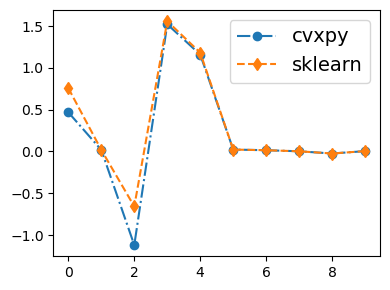

b's value of cvxpy   = -0.0631
b's value of sklearn = -0.0631


In [6]:
plt.figure(figsize=(4,3))
plt.plot(a.value, 'o-.', label="cvxpy")
plt.plot(model.coef_[0,:], 'd--', label="sklearn")
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

print("b's value of cvxpy   = {:.4f}".format(b.value))
print("b's value of sklearn = {:.4f}".format(model.intercept_[0]))